## importing necessary libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math

## we are reading our californina housing price dataset in file "housing.cvs" using read_csv() method of pandas

In [28]:
data =pd.read_csv("datasets/housing.csv")

print("data.shape : \n",data.shape)

data.head()

data.shape : 
 (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Cleaning 
##  making sure that our data is icluding only those features which are having integer or float as datatype 
### we do so by using pandas' select_dtypes() method.

In [29]:
data=data.select_dtypes(include=('float64','int64'))

### now we have removed 'ocean_proximity' feature from our data successively

# Data Normalisation
## Here we are doing standard normalisation by subtraction data by mean and dividing it with standard deviation so that our data can be standardised with mean=0 and std=1

In [31]:
print("Before Normalisation: \n")
print("data.mean(): ",np.array(data.mean()))
print("data.std(): ",np.array(data.std()))

data =(data -data.mean())/data.std()

print("\n After Normalisation: \n")
print("data.mean(): ",np.array(data.mean()))
print("data.std(): ",np.array(data.std()))

Before Normalisation: 

data.mean():  [-1.19569704e+02  3.56318614e+01  2.86394864e+01  2.63576308e+03
  5.37870553e+02  1.42547674e+03  4.99539680e+02  3.87067100e+00
  2.06855817e+05]
data.std():  [2.00353172e+00 2.13595240e+00 1.25855576e+01 2.18161525e+03
 4.21385070e+02 1.13246212e+03 3.82329753e+02 1.89982172e+00
 1.15395616e+05]

 After Normalisation: 

data.mean():  [-1.42921497e-12 -7.63668091e-14  1.81739851e-15 -9.59080199e-17
 -1.99180520e-16 -2.83652839e-16  7.56386502e-17 -2.52380965e-14
  3.76787318e-16]
data.std():  [1. 1. 1. 1. 1. 1. 1. 1. 1.]


# making sure that our data is not having any NaN value
### check which feature is having NaN values with pandas.isna() method

In [32]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [33]:
#so here we find that 203 rows are there that are having NaN value in "total_bedrooms" feature
# we will drop those rows by dropna() method with axis=0 i.e., row-wise.

data=data.dropna(axis=0)

In [34]:
data.shape

(20433, 9)

## splitting data into X (features) and Y (target_variable)

In [35]:
X=data.drop('median_house_value',axis=1).copy()
Y=data['median_house_value']

## splitting of data into training and testing

### writing train_split_data 

In [36]:
def train_test_split(X,Y,test_size=0.25,train_size=.75):
    
    train_size=1-test_size
    
    x_train=np.array(X[: int(train_size*X.shape[0])])
    x_test=np.array(X[ int(train_size*X.shape[0]):])
    
    y_train=Y[: int(train_size*len(Y))]
    y_train=np.array(y_train)
    y_train=y_train.reshape(len(y_train),1)
    
    y_test=Y[int(train_size*len(Y)):]
    y_test=np.array(y_test)
    y_test=y_test.reshape(len(y_test),1)
    
    return x_train,x_test,y_train,y_test

## In Polynomial Regression, of degree n
### we raise the power of each feature from 1 to n and will treat them as separate feature

In [43]:
def create_x_poly(x,degree=2):
    temp=pd.DataFrame()
    for deg in range(1,degree+1):
        temp=pd.concat([temp,data**deg],axis=1)
    return temp

In [48]:
X_temp=create_x_poly(X,2)

In [49]:
X_temp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,2.129580,1.763061,1.107804,0.964557,0.647702,0.941485,0.949465,0.954547,5.497660,4.535111
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,1.314124,1.749831,1.088181,0.368454,4.185464,1.817759,0.742041,2.788635,5.439070,1.726923
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,1.258663,1.776340,1.078436,3.445243,0.287010,0.681518,0.673643,0.711689,3.177863,1.584232
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,1.165072,1.789670,1.078436,3.445243,0.389625,0.516602,0.586771,0.538409,0.870386,1.357392
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,1.172871,1.789670,1.078436,3.445243,0.213807,0.374494,0.577339,0.395820,0.000166,1.375627


In [50]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881


## splitting X,Y into training testing part using train_test_split()

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X_temp,Y)

# initiallising the weights and bias from standard normal distribution

In [55]:
weights0=np.random.rand(X_temp.shape[1],1)
bias0=np.random.rand(1,1)

In [85]:
error(weights0,x_train,bias0,y_train)

390.99332312744434

# to avoid overfitting, regularisation is done
## reg_param can take any value between 0 and 1

In [87]:
def curve(m,x,c):
    return (np.matmul(x,m)+c)
def error(m,x,c,y,reg_param=0):
    return np.mean((curve(m,x,x)-y)**2) + reg_param*(np.sum(m)**2)

def derivative_wrt_weights(m,x,c,y,reg_param=0):
    derivatives=2*(np.mean(np.multiply(x,curve(m,x,c)-y),axis=0)) + 2*reg_param*(np.sum(m))
    derivatives= np.array(derivatives)
    derivatives=derivatives.reshape(x.shape[1],1)
    return derivatives
     

def derivative_wrt_bias(m,x,c,y,reg_param=0):
    return (2*np.mean(curve(m,x,c)-y)) 

def scalar(x):
    return (x-np.mean(x))/np.std(x)

def accuracy(error,y):
    return (1 -error/np.sum(y**2))*100

In [101]:
def model_result(alpha,num_of_iteration,reg_param=0):
    weights=weights0
    bias=bias0
   # lr=[]
    error_cost=[]
    for i in range(num_of_iteration):
       # alpha=alpha /((1.0085 )**i)
       # alpha =alpha*(i+.9) *.0005
        
      #  alpha=alpha/(1.01 + (i%100)*.00001) 
    
       # alpha =math.pow(alpha,1.5)*.00001 if i%500==0 and 1>10 else math.pow(alpha,1.0005)
        
        weights = weights - alpha * derivative_wrt_weights(weights,x_train,bias,y_train,reg_param)
        bias = bias - alpha * derivative_wrt_bias(weights,x_train,bias,y_train,reg_param)
        
        error_cost.append(error(weights,x_train,bias,y_train,reg_param))
        print("Error is: ",error_cost[i])
        clear_output(True)
    #    lr.append(alpha)
    #print("lr func")
   # plt.plot(lr)
    #plt.show()
    print("cost func")
    plt.plot(error_cost)
    print("Accuracy is: ",accuracy(error_cost[-1],y_train))
    print("At endError is: ",error(weights,x_train,bias,y_train,reg_param))
    return weights,bias


cost func
Accuracy is:  99.49004555166542
At endError is:  73.19018233300469


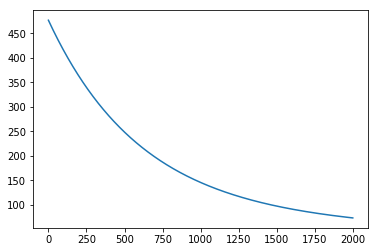

In [105]:
 # getting the parameters weights and bias
weights,bias = model_result(alpha=.0000025,num_of_iteration=2000,reg_param=0.85)

# accuracy on training data:

In [106]:
print("Error is : ",error(weights,x_train,bias,y_train))
print("Accuracy is : ",accuracy(error(weights,x_train,bias,y_train),y_train),"%")

Error is :  38.77586669089
Accuracy is :  99.72982816715663 %


# TESTING

In [107]:
print("Error is : ",error(weights,x_test,bias,y_test))
print("Accuracy is : ",accuracy(error(weights,x_test,bias,y_test),y_test),"%")

Error is :  17.779770724416842
Accuracy is :  99.70823598701712 %


##  We can set the values for learning rate alpha and regularisation parameter by hit and trial.
